# Feverup EDA (events & tickets)

## Librerías

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px
from wordcloud import WordCloud

## EDA ('events' data)
Analizar la tendencia de los eventos para obtener información sobre:
- 1. Categorías de eventos
- 2. Eventos en categorías tendencia (TOP 4: MIX, ART, SPORT, TASTING). 
- 3. Eventos últimos meses
- 4. Franjas horarias de los eventos (límites 12:00 y 18:00)
- 5. Distribución eventos según día de la semana (por categoría y horario)
- 6. Horario tendencia 
- 7. Eventos según categoría y hora

### Lectura 'events'

In [30]:
link_data = "https://docs.google.com/spreadsheets/d/1cTW5rp8av-12UuJ4zDkrqTRUDR4hokKSvWPqKl_WO3g/export?format=csv"             # 'export?format=csv' -> añadir para que exporte correctamente desde google sheets
events = pd.read_csv(link_data)
events.head()

,event_url,event_category,title,datetime_local,name,city,state,country,postal_code
0,https://feverup.com/m/91113,MIX,Swan Boat Rental in Echo Park,2023-10-18 9:12:00,Echo Park Lake,Los Angeles,CA,US,90026
1,https://feverup.com/m/124686,WELLNESS,American Dream - The Rink,2023-11-06 17:00:00,Nickelodeon Universe Theme Park,New York,NJ,US,7072
2,https://feverup.com/m/123513,MIX,360 CHICAGO Observation Deck,2023-10-14 13:00:00,360 Chicago - John Hancock Center,Chicago,IL,US,60611
3,https://feverup.com/m/126946,MIX,Toronto Old Town City Exploration Game,2024-01-31 17:00:00,St Lawrence Market,Toronto,ON,CA,M5E 1C3
4,https://feverup.com/m/138878,MIX,Tufting Workshop - Make your unique rug and ta...,2024-07-05 13:00:00,Sense 7 Tufting and Handcrafts,New York,NY,US,10018


### Países del estudio
US: Estados Unidos, GB: Reino Unido (Gran Bretaña), CA: Canadá, IE: Irlanda

In [31]:
events['country'].value_counts()

US    138903
GB     70593
CA     15401
IE      3382
Name: country, dtype: int64

### 1. Categorías de eventos

In [32]:
# TIPOS DE CATEGORÍAS Y EL TOTAL DE EVENTOS EN CADA UNA

fig = px.bar(events, 
             x=events['event_category'].value_counts().index, 
             y=events['event_category'].value_counts().values,
             color=events['event_category'].value_counts().index)

fig.update_layout(width=1200, height=600,                                                   # Ajustar el tamaño de la figura
                    title_text='<b>Trending categories of events</b>', title_x=0.5,         # Centrar el título y ponerlo en negrita
                    xaxis_title='', yaxis_title='',                                         # Ocultar los nombres de los ejes
                    showlegend=False) 

fig.show()

### 2. Eventos en categorías tendencia (TOP 4: MIX, ART, SPORT, TASTING). 

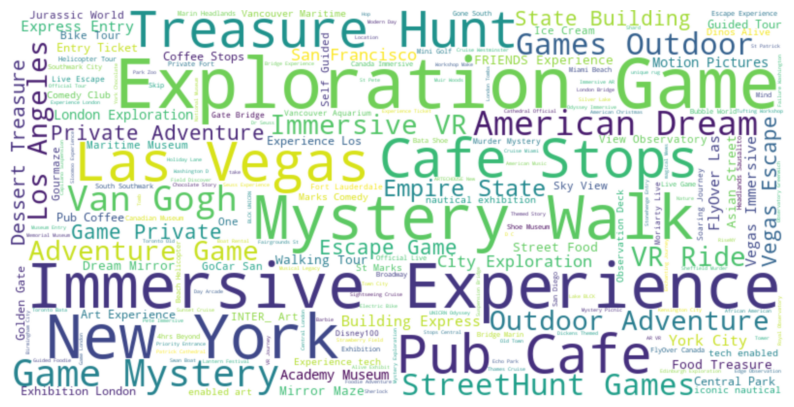

In [33]:
# GRÁFICA CON PALABRAS MÁS POPULARES EN LOS EVENTOS DE LA CATEGORÍA 'MIX'

mix_events = events[events['event_category']=='MIX']                                        # Filtrar eventos categoría 'MIX'
titles = ' '.join(mix_events['title'])                                                      # Concatenar todos los títulos en una sola cadena
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(titles)     # Crear un objeto WordCloud


# Mostrar el gráfico de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bicubic')                                              # imshow() muestra el gráfico de palabras generado por WordCloud
                                                                                            # Opciones de interpolación: 'bilinear', 'nearest', 'bicubic', 'hamming'
plt.axis('off')
plt.show()

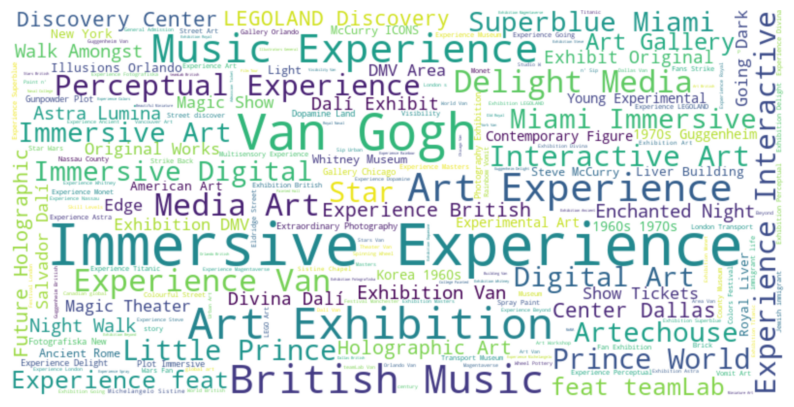

In [34]:
# GRÁFICA CON PALABRAS MÁS POPULARES EN LOS EVENTOS DE LA CATEGORÍA 'ART'

mix_events = events[events['event_category']=='ART']                                        # Filtrar eventos categoría 'ART'
titles = ' '.join(mix_events['title'])                                                      # Concatenar todos los títulos en una sola cadena
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(titles)     # Crear un objeto WordCloud


# Mostrar el gráfico de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bicubic')                                              # imshow() muestra el gráfico de palabras generado por WordCloud
                                                                                            # Opciones de interpolación: 'bilinear', 'nearest', 'bicubic', 'hamming'
plt.axis('off')
plt.show()

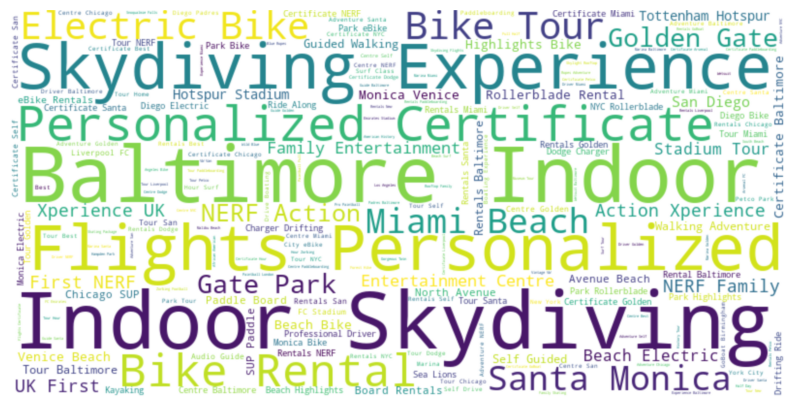

In [35]:
# GRÁFICA CON PALABRAS MÁS POPULARES EN LOS EVENTOS DE LA CATEGORÍA 'SPORT'

mix_events = events[events['event_category']=='SPORT']                                      # Filtrar eventos categoría 'SPORT'
titles = ' '.join(mix_events['title'])                                                      # Concatenar todos los títulos en una sola cadena
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(titles)     # Crear un objeto WordCloud


# Mostrar el gráfico de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bicubic')                                              # imshow() muestra el gráfico de palabras generado por WordCloud
                                                                                            # Opciones de interpolación: 'bilinear', 'nearest', 'bicubic', 'hamming'
plt.axis('off')
plt.show()

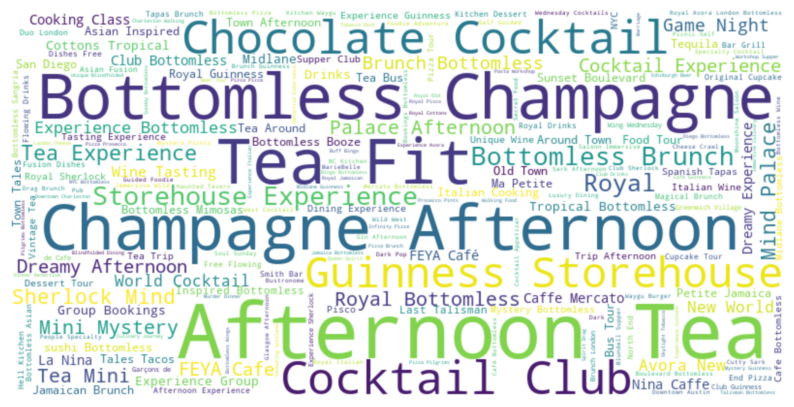

In [36]:
# GRÁFICA CON PALABRAS MÁS POPULARES EN LOS EVENTOS DE LA CATEGORÍA 'TASTING'

mix_events = events[events['event_category']=='TASTING']                                    # Filtrar eventos categoría 'TASTING'
titles = ' '.join(mix_events['title'])                                                      # Concatenar todos los títulos en una sola cadena
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(titles)     # Crear un objeto WordCloud


# Mostrar el gráfico de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bicubic')                                              # imshow() muestra el gráfico de palabras generado por WordCloud
                                                                                            # Opciones de interpolación: 'bilinear', 'nearest', 'bicubic', 'hamming'
plt.axis('off')
plt.show()

### 3. Eventos últimos meses 

In [37]:
# MODIFICAR COLUMNA 'datime_local' A TIPO DATETIME
events['datetime_local'] = pd.to_datetime(events['datetime_local'])           

In [38]:
# EVENTOS HASTA ABRIL 2024

events_sorted = events.sort_values(by='datetime_local')                                     # Ordenar datos según 'datetime_local' 
events_sorted.set_index('datetime_local', inplace=True)                                     # Restablecer índice
events_filtered = events_sorted[events_sorted.index <= '2024-04-01 00:00:00']               # Filtrar los datos hasta abril de 2024
events_by_month = events_filtered.resample('M').size()                                      # Resample -> re-muestrea los datos en intervalos de meses y calcula el tamaño de cada intervalo

# Gráfica lineal
fig = px.line(events_by_month, 
              x=events_by_month.index, 
              y=events_by_month.values,
              labels={'x': 'Date', 'y': 'Events count'},
              markers=True, 
              line_shape='linear')

fig.update_layout(width=1200, height=600,                                                   # Ajustar el tamaño de la figura
                    title_text='<b>Total events in the last months</b>', title_x=0.5,       # Centrar el título y ponerlo en negrita
                    xaxis_title='', yaxis_title='')                                         # Ocultar los nombres de los ejes

fig.show()

In [39]:
september_events = events[events['datetime_local'] < '2023-10-01 00:00:00']
september_events

,event_url,event_category,title,datetime_local,name,city,state,country,postal_code
63282,https://feverup.com/m/138431,IGHTLIF,Meet Cute at The Montalban,2023-09-20 19:00:00,The Montalbán Theatre,Los Angeles,CA,US,90028
70052,https://feverup.com/m/138431,IGHTLIF,Meet Cute at The Montalban,2023-09-18 18:00:00,The Montalbán Theatre,Los Angeles,CA,US,90028
71026,https://feverup.com/m/138431,IGHTLIF,Meet Cute at The Montalban,2023-09-25 19:00:00,The Montalbán Theatre,Los Angeles,CA,US,90028
125524,https://feverup.com/m/138431,IGHTLIF,Meet Cute at The Montalban,2023-09-27 19:00:00,The Montalbán Theatre,Los Angeles,CA,US,90028
181395,https://feverup.com/m/138431,IGHTLIF,Meet Cute at The Montalban,2023-09-18 19:00:00,The Montalbán Theatre,Los Angeles,CA,US,90028
187019,https://feverup.com/m/138431,IGHTLIF,Meet Cute at The Montalban,2023-09-19 19:00:00,The Montalbán Theatre,Los Angeles,CA,US,90028
196767,https://feverup.com/m/138431,IGHTLIF,Meet Cute at The Montalban,2023-09-26 19:00:00,The Montalbán Theatre,Los Angeles,CA,US,90028


In [40]:
inicio_datos = events['datetime_local'].min()
print("Los datos empezaron a almacenarse el: ", inicio_datos)

Los datos empezaron a almacenarse el:  2023-09-18 18:00:00


### 4. Distribución eventos según día de la semana (por categoría y horario)

In [41]:
# TOTAL EVENTOS SEGÚN DÍA DE LA SEMANA

events['day_of_week'] = events['datetime_local'].dt.day_name()                              # Obtener el nombre del día de la semana para cada fecha
events_per_day = events['day_of_week'].value_counts().reset_index()                         # Contar la frecuencia de eventos por día de la semana y restablecer índice para tener df con 2 columnas
events_per_day.columns = ['Day of week', 'Event count']                 

# Crear el gráfico de barras
fig = px.bar(events_per_day, 
             x='Day of week', 
             y='Event count', 
             labels={'Event Count': 'Number of Events'})          

fig.update_layout(width=1200, height=600,                                                    # Ajustar el tamaño de la figura
                    title_text='<b>Event distribution by day of week</b>', title_x=0.5,      # Centrar el título y ponerlo en negrita
                    xaxis_title='', yaxis_title='')                                          # Ocultar los nombres de los ejes

# Mostrar el gráfico
fig.show()

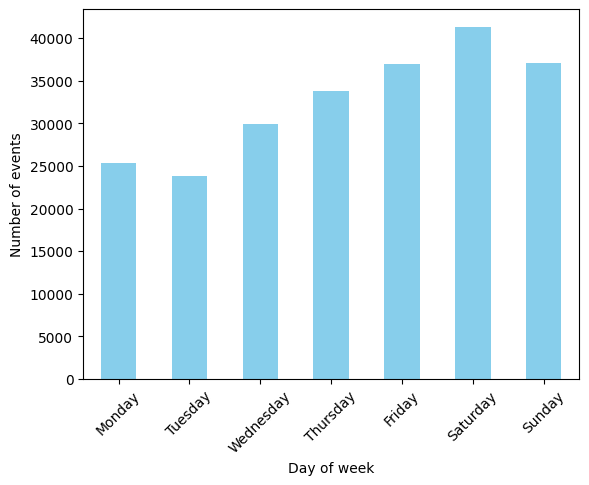

In [42]:

# TOTAL EVENTOS SEGÚN DÍA DE LA SEMANA (opción 2)
distribution_by_day = events['day_of_week'].value_counts()

# Ordenar los días de la semana
distribution_by_day = distribution_by_day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Graficar
distribution_by_day.plot(kind='bar', color='skyblue')
plt.xlabel('Day of week')
plt.ylabel('Number of events')
plt.xticks(rotation=45)
plt.show()

### 5. Franjas horarias de los eventos (límites 12:00 y 18:00)

In [43]:
# ANALIZAR LA DISTRIBUCIÓN DE EVENTOS POR FRANJAS HORARIAS

# Función para crear nueva columna con franja horaria de los eventos (morning, afternoon, night)
def get_time_slot(hour):
    '''
    Clasifica la hora según intervalos.

    Parameters:
    - datetime (hour): La hora de la fecha en columna formato datetime.

    Returns:
    - string:   'morning' si la hora es anterior a las 12:00, 
                'afternoon' si es comprendida entre las 12:00 y las 18:00,
                'night' si es posterior a las 18:00.
    '''
 
    if hour < 12:
        return 'morning'
    elif hour < 18:
        return 'afternoon'
    else:
        return 'night'

# Aplicar la función a la columna 'datetime_local' para obtener la franja horaria
events['time_slot'] = events['datetime_local'].apply(lambda x: get_time_slot(x.hour))       # A través de la función lambda se accede a la hora de cada fila y se aplica la función a cada una con .apply
events.head()

,event_url,event_category,title,datetime_local,name,city,state,country,postal_code,day_of_week,time_slot
0,https://feverup.com/m/91113,MIX,Swan Boat Rental in Echo Park,2023-10-18 09:12:00,Echo Park Lake,Los Angeles,CA,US,90026,Wednesday,morning
1,https://feverup.com/m/124686,WELLNESS,American Dream - The Rink,2023-11-06 17:00:00,Nickelodeon Universe Theme Park,New York,NJ,US,7072,Monday,afternoon
2,https://feverup.com/m/123513,MIX,360 CHICAGO Observation Deck,2023-10-14 13:00:00,360 Chicago - John Hancock Center,Chicago,IL,US,60611,Saturday,afternoon
3,https://feverup.com/m/126946,MIX,Toronto Old Town City Exploration Game,2024-01-31 17:00:00,St Lawrence Market,Toronto,ON,CA,M5E 1C3,Wednesday,afternoon
4,https://feverup.com/m/138878,MIX,Tufting Workshop - Make your unique rug and ta...,2024-07-05 13:00:00,Sense 7 Tufting and Handcrafts,New York,NY,US,10018,Friday,afternoon


In [44]:
# PORCENTAJE EVENTOS EN CADA FRANJA HORARIA

time_slot_counts = events['time_slot'].value_counts()                                       # Calcular el total de eventos en cada franja horaria

# Crear el gráfico circular
fig = px.pie(time_slot_counts, 
             values=time_slot_counts.values, 
             names=time_slot_counts.index, 
             color_discrete_sequence=px.colors.diverging.Portland)

fig.update_layout(width=1200, height=600,                                                    # Ajustar el tamaño de la figura
                    title_text='<b>% of events by time slot</b>', title_x=0.5,               # Centrar el título y ponerlo en negrita
                    xaxis_title='', yaxis_title='')                                          # Ocultar los nombres de los ejes

fig.update_traces(textinfo='percent+label', textfont_size=16)                                # Ajustar el tamaño del texto en la leyenda y los números dentro del gráfico
fig.show()

In [45]:
# TOTAL EVENTOS EN LA FRANJA 'AFTERNOON' (TOP 4 EVENT CATEGORY)

events_afternoon = events[events['time_slot'] == 'afternoon']                                                                   # Filtrar eventos que ocurren en la franja de tarde
event_category_counts = events_afternoon['event_category'].value_counts()                                                       # Contar la cantidad de cada 'event_category' en la franja de tarde
top_categories = event_category_counts.head(4).index                                                                            # Seleccionar las 4 categorías principales
events_afternoon_top_categories = events_afternoon[events_afternoon['event_category'].isin(top_categories)]                     # Filtrar el DataFrame para incluir solo las 4 categorías principales
event_category_counts_top = events_afternoon_top_categories['event_category'].value_counts().sort_values(ascending=False)       # Contar la cantidad de eventos por categoría en las 4 categorías principales

# Crear el gráfico de barras horizontales
fig = px.bar(event_category_counts_top, 
             x=event_category_counts_top.values, 
             y=event_category_counts_top.index, 
             orientation='h',
             title='Total of events in the afternoon (12:00-18:00) - Top 4 categories',
             labels={'x': 'Total of events', 'y': 'Event category'},
             color_discrete_sequence=px.colors.diverging.Portland)


fig.update_layout(width=1200, height=600,                                                                                       # Ajustar el tamaño de la figura
                    title_text='<b>Total of events in the afternoon (12:00-18:00) - Top 4 categories</b>', title_x=0.5,         # Centrar el título y ponerlo en negrita
                    xaxis_title='', yaxis_title='')                                                                             # Ocultar los nombres de los ejes

# Mostrar el gráfico
fig.show()

### 6. Horario tendencia 

In [46]:
# HORAS TENDENCIA A LO LARGO DEL DÍA
events['hour'] = events['datetime_local'].dt.hour                                           # Extraer la hora del día de la columna 'datetime_local'
hourly_event_counts = events.groupby('hour').size()                                         # Número de eventos en cada hora del día
peak_hour = hourly_event_counts.idxmax()                                                    # Encontrar la hora con el mayor número de eventos
print("La hora pico de eventos es:", peak_hour)

La hora pico de eventos es: 12


In [47]:
# Crear el gráfico de barras
fig = px.bar(hourly_event_counts, 
             x=hourly_event_counts.index, 
             y=hourly_event_counts.values,
             labels={'x': 'Time', 'y': 'Total of events'})

# Personalizar el diseño del gráfico
fig.update_layout(xaxis=dict(type='category'),                                              # Tipo 'category' para que aparecan todas las horas
                    width=1200, height=600,                                                 # Ajustar el tamaño de la figura
                    title_text='<b>Trending time</b>', title_x=0.5,                         # Centrar el título y ponerlo en negrita
                    xaxis_title='', yaxis_title='')                                         # Ocultar los nombres de los ejes

fig.show()

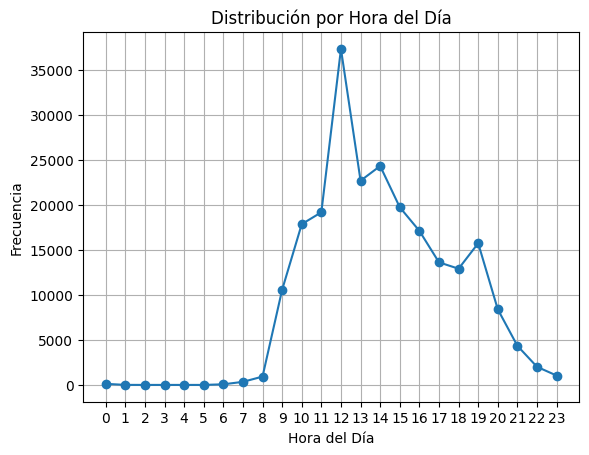

In [48]:
# DISTRIBUCIÓN POR HORAS
# Agrupar por hora del día y contar ocurrencias
distribution_by_hour = events['datetime_local'].dt.hour.value_counts().sort_index()

# Graficar
distribution_by_hour.plot(kind='line', marker='o')
plt.xlabel('Hora del Día')
plt.ylabel('Frecuencia')
plt.title('Distribución por Hora del Día')
plt.xticks(range(24))
plt.grid(True)
plt.show()

### 7. Eventos según categoría y hora

In [49]:
# DISTRIBUCIÓN DE TIPOS DE EVENTOS A LO LARGO DE LAS HORAS

events_schedule = events[['hour', 'event_category']]                                                        # Crear un DataFrame con la hora y la categoría
event_counts = events_schedule.groupby(['hour', 'event_category']).size().reset_index(name='count')         # Contar el número de eventos por hora y categoría

# Crear el gráfico de barras agrupado por hora y categoría
fig = px.bar(event_counts, 
             x='hour', 
             y='count', 
             color='event_category',
             labels={'hour': 'Time (hour)', 'count': 'Events count'})

# Personalizar el diseño del gráfico
fig.update_layout(xaxis=dict(type='category'),                                                              # Tipo 'category' para mostrar todas las horas
                    width=1200, height=800,                                                                 # Ajustar el tamaño de la figura
                    title_text='<b>Distribution of categories by time</b>', title_x=0.5)                    # Título en negrita y centrado

fig.show()

## EDA ('tickets' data)
'tickets' es una muestra de datos de feverup también, pero independiente de la anterior. Es interesante para analizar variables numéricas, como 'ticket_price' y 'quantity'

### Lectura 'tickets'

In [50]:
link_data = "https://docs.google.com/spreadsheets/d/1QvsVM0K2YZWGuFNoKJzaZrRFsvCtmYbMCTvf3twFCgY/export?format=csv"
tickets = pd.read_csv(link_data)
tickets.head()

,event_url,title,datetime_local,city,state,country,postal_code,ticket_id,ticket_price,total_price,quantity,event_category
0,https://feverup.com/m/100120,Top Stand-Up Comedy in Covent Garden,2023-10-27 20:30:00,London,England,GB,WC2H 9LA,36853293,16.0,16.0,50,THEATER
1,https://feverup.com/m/100120,Top Stand-Up Comedy in Covent Garden,2023-10-27 20:30:00,London,England,GB,WC2H 9LA,36853261,20.0,20.0,50,THEATER
2,https://feverup.com/m/100120,Top Stand-Up Comedy in Covent Garden,2023-10-20 20:30:00,London,England,GB,WC2H 9LA,36853292,16.0,16.0,50,THEATER
3,https://feverup.com/m/100120,Top Stand-Up Comedy in Covent Garden,2023-10-20 20:30:00,London,England,GB,WC2H 9LA,36853259,20.0,20.0,50,THEATER
4,https://feverup.com/m/100120,Top Stand-Up Comedy in Covent Garden,2023-10-21 20:30:00,London,England,GB,WC2H 9LA,36853324,17.0,17.0,50,THEATER


DETALLE COLUMNAS:       
* event_url: La URL del evento en el sitio web de Feverup.
* title: El título o nombre del evento.
* datetime_local: La fecha y hora del evento en la zona horaria local.
* city: La ciudad donde se llevará a cabo el evento.
* state: El estado o provincia donde se llevará a cabo el evento.
* country: El país donde se llevará a cabo el evento.
* postal_code: El código postal del lugar donde se llevará a cabo el evento.
* ticket_id: Un identificador único para el boleto.
* ticket_price: El precio de un solo boleto. (VARIABLE OBJETIVO)
* total_price: El precio total de todos los boletos en una transacción.
* quantity: La cantidad de boletos comprados en una transacción.
* event_category: categoría del evento.

In [51]:
tickets.shape                                                                                               

(2655, 12)

In [52]:
tickets['ticket_id'] = tickets['ticket_id'].astype(str)                                                     # Modificar columna 'ticket_id' a object
tickets.describe().T

,count,mean,std,min,25%,50%,75%,max
ticket_price,2655.0,94.415224,89.928766,5.0,16.0,40.00,180.0,270.0
total_price,2655.0,94.449808,89.910965,5.0,16.0,43.55,180.0,270.0
quantity,2655.0,10.126930,12.580086,1.0,1.0,12.00,12.0,100.0


### Correlación variables

In [53]:
# Verificar valores únicos en la columna 'event_category'
unique_categories = tickets['event_category'].unique()
print(unique_categories)

['THEATER' 'TASTING' 'IGHTLIF' 'CONCERT' 'WELLNESS' 'MIX']


In [54]:
# CODIFICAR COLUMNA 'event_category' PARA AÑADIRLA A CORRELACION

encoded_categories = pd.get_dummies(tickets['event_category'], prefix='category')                           # Aplicar codificación one-hot a la columna 'event_category'
tickets = pd.concat([tickets, encoded_categories], axis=1)                                                  # Concatenar las columnas codificadas con el DataFrame original
tickets.head()                                                                                              # Comprobar

,event_url,title,datetime_local,city,state,country,postal_code,ticket_id,ticket_price,total_price,quantity,event_category,category_CONCERT,category_IGHTLIF,category_MIX,category_TASTING,category_THEATER,category_WELLNESS
0,https://feverup.com/m/100120,Top Stand-Up Comedy in Covent Garden,2023-10-27 20:30:00,London,England,GB,WC2H 9LA,36853293,16.0,16.0,50,THEATER,0,0,0,0,1,0
1,https://feverup.com/m/100120,Top Stand-Up Comedy in Covent Garden,2023-10-27 20:30:00,London,England,GB,WC2H 9LA,36853261,20.0,20.0,50,THEATER,0,0,0,0,1,0
2,https://feverup.com/m/100120,Top Stand-Up Comedy in Covent Garden,2023-10-20 20:30:00,London,England,GB,WC2H 9LA,36853292,16.0,16.0,50,THEATER,0,0,0,0,1,0
3,https://feverup.com/m/100120,Top Stand-Up Comedy in Covent Garden,2023-10-20 20:30:00,London,England,GB,WC2H 9LA,36853259,20.0,20.0,50,THEATER,0,0,0,0,1,0
4,https://feverup.com/m/100120,Top Stand-Up Comedy in Covent Garden,2023-10-21 20:30:00,London,England,GB,WC2H 9LA,36853324,17.0,17.0,50,THEATER,0,0,0,0,1,0


In [55]:
# CORRELACIÓN 
correlation = tickets[['ticket_price', 'quantity', 'category_MIX', 'category_TASTING', 'category_THEATER', 'category_WELLNESS', 'category_CONCERT', 'category_IGHTLIF']].corr()
correlation.corr()

,ticket_price,quantity,category_MIX,category_TASTING,category_THEATER,category_WELLNESS,category_CONCERT,category_IGHTLIF
ticket_price,1.000000,-0.845127,0.989216,-0.397010,-0.256637,-0.135325,-0.246930,-0.883235
quantity,-0.845127,1.000000,-0.865395,0.707657,0.386153,0.096013,0.449405,0.545500
category_MIX,0.989216,-0.865395,1.000000,-0.427673,-0.238365,-0.141142,-0.253090,-0.883289
category_TASTING,-0.397010,0.707657,-0.427673,1.000000,0.083421,-0.014121,0.101612,0.029733
category_THEATER,-0.256637,0.386153,-0.238365,0.083421,1.000000,-0.055048,0.007843,0.084465
category_WELLNESS,-0.135325,0.096013,-0.141142,-0.014121,-0.055048,1.000000,-0.055858,0.025329
category_CONCERT,-0.246930,0.449405,-0.253090,0.101612,0.007843,-0.055858,1.000000,0.079028
category_IGHTLIF,-0.883235,0.545500,-0.883289,0.029733,0.084465,0.025329,0.079028,1.000000


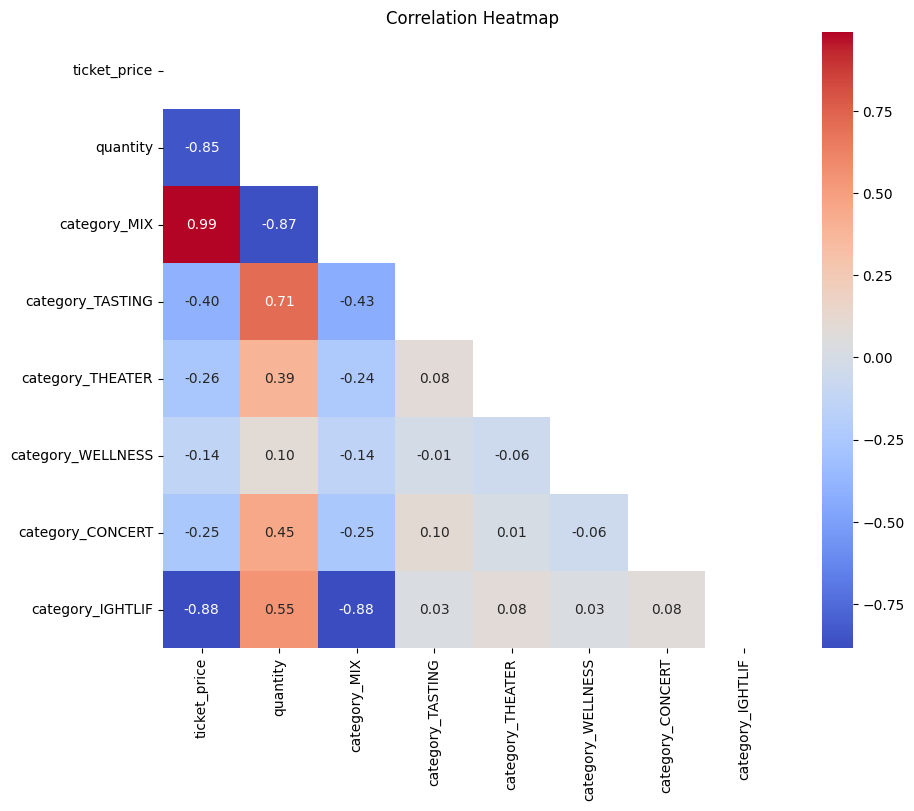

In [56]:
correlation_matrix = correlation.corr()

# Crear una máscara triangular inferior
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask=mask)
plt.title('Correlation Heatmap')
plt.show()

### Variable 'event_url'

In [57]:
# NÚMERO DE EVENTOS ÚNICOS EN LA MUESTRA DE DATOS (cada evento tiene x cantidad de pases en las distintas ciudades y horarios)
unique_events = tickets['event_url'].nunique()
print("El dataset cuenta con una muestra de" ,unique_events, "eventos únicos.")

El dataset cuenta con una muestra de 19 eventos únicos.


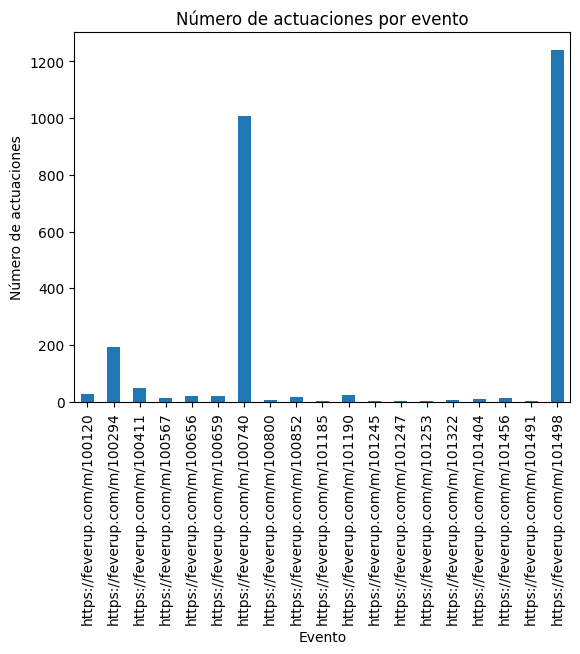

In [78]:
# CUÁNTOS PASES POR CADA EVENTO ÚNICO
events_actuations = tickets.groupby('event_url').size()                                                     # Agrupar los datos por el evento y contar el número de actuaciones por evento

# Visualizar el conteo en un diagrama de barras
events_actuations.plot(kind='bar')
plt.title('Número de actuaciones por evento')
plt.xlabel('Evento')
plt.ylabel('Número de actuaciones')
plt.show()

### Variable 'datetime_local'

In [61]:
# TIEMPO DE LA MUESTRA DE DATOS
start_date = tickets['datetime_local'].min().date()                                                         # Seleccionar fecha sin hora
end_date = tickets['datetime_local'].max().date()

print("Los datos son de", (end_date-start_date).days, "días.")
print("Comienzo:", start_date)
print("Fin:     ", end_date)

Los datos son de 84 días.
Comienzo: 2023-10-08
Fin:      2023-12-31


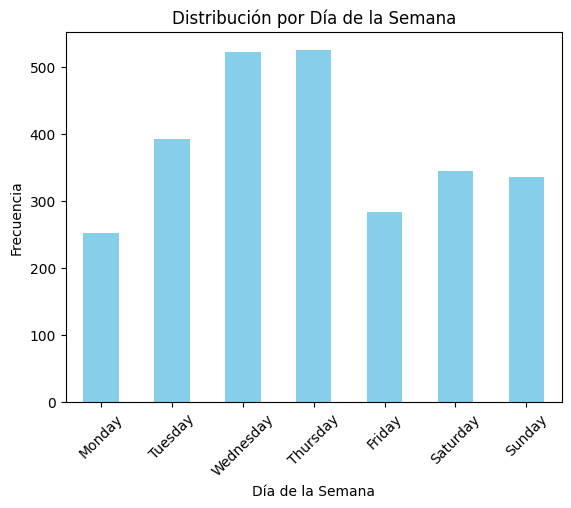

In [62]:
# DISTRIBUCIÓN POR DÍA DE LA SEMANA
tickets['day_of_week'] = tickets['datetime_local'].dt.day_name()                                                                    # Agrupar por día de la semana y contar ocurrencias
distribution_by_day = tickets['day_of_week'].value_counts()
distribution_by_day = distribution_by_day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])   # Ordenar los días de la semana
distribution_by_day.plot(kind='bar', color='skyblue')                                                                               # Graficar
plt.xlabel('Día de la Semana')
plt.ylabel('Frecuencia')
plt.title('Distribución por Día de la Semana')
plt.xticks(rotation=45)
plt.show()

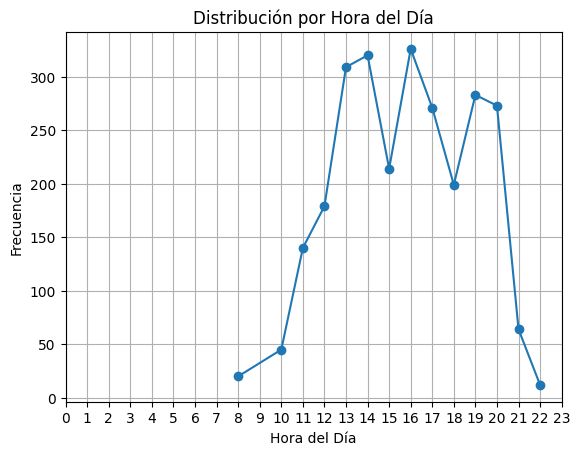

In [63]:
# DISTRIBUCIÓN POR HORAS
# Agrupar por hora del día y contar ocurrencias
distribution_by_hour = tickets['datetime_local'].dt.hour.value_counts().sort_index()

# Graficar
distribution_by_hour.plot(kind='line', marker='o')
plt.xlabel('Hora del Día')
plt.ylabel('Frecuencia')
plt.title('Distribución por Hora del Día')
plt.xticks(range(24))
plt.grid(True)
plt.show()

### Variable 'ticket_price'

In [64]:
# DISTRIBUCIÓN 'ticket_price'
fig = px.box(tickets, x='ticket_price')
                                                                                                            
fig.update_layout(width=1200, height=600,                                                                   # Ajustar el tamaño de la figura
                    title_text='<b>Distribution of ticket prices ($)</b>', title_x=0.5,                     # Centrar el título y ponerlo en negrita
                    xaxis_title='', yaxis_title='')                                                         # Ocultar los nombres de los ejes

# Mostrar el boxplot
fig.show()

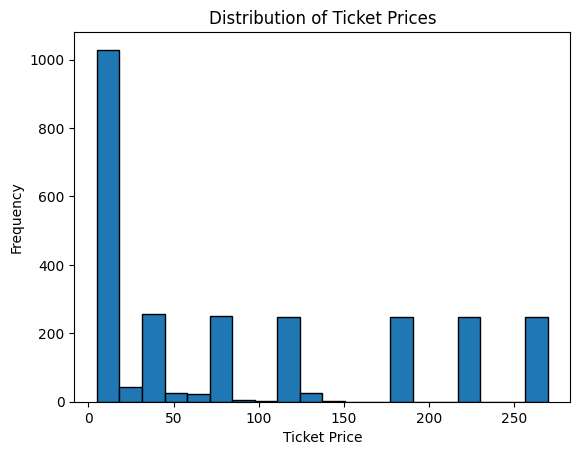

In [65]:
plt.hist(tickets['ticket_price'], bins=20, edgecolor='black')
plt.xlabel('Ticket Price')
plt.ylabel('Frequency')
plt.title('Distribution of Ticket Prices')
plt.show()

### LOS DATOS DE 'ticket_price' NO SIGUEN UNA DISTRIBUCIÓN NORMAL 

In [66]:
tickets['ticket_price'].value_counts()

16.00     1015
80.00      252
225.00     248
180.00     248
120.00     248
270.00     248
35.00      198
129.00      24
20.00       17
18.99       12
39.99       12
34.99       12
49.99       12
36.00       12
62.00       10
32.00       10
39.00       10
67.00       10
45.00        8
17.00        7
24.00        7
18.00        5
50.00        4
97.00        3
87.30        3
25.00        3
5.00         2
30.00        2
40.00        2
55.00        2
70.00        2
99.00        1
119.00       1
65.00        1
125.00       1
150.00       1
38.00        1
26.00        1
Name: ticket_price, dtype: int64

In [82]:
# DISTRIBUCIÓN 'ticket_price' en MIX EVENTS
mix_tickets = tickets[tickets['event_category'] == 'MIX']

# Crear el boxplot
fig = px.box(mix_tickets, x='ticket_price', title='')

fig.update_layout(width=1200, height=600,                                                                   # Ajustar el tamaño de la figura
                    title_text='<b>Distribution of ticket prices for MIX EVENTS ($)</b>', title_x=0.5,      # Centrar el título y ponerlo en negrita
                    xaxis_title='', yaxis_title='')                                                         # Ocultar los nombres de los ejes

# Mostrar el boxplot
fig.show()

In [68]:
# MEDIA DE 'ticket_price' POR CATEGORÍAS DE EVENTOS
mean_prices = tickets.groupby('event_category')['ticket_price'].mean()
print(mean_prices)

event_category
CONCERT      40.477273
IGHTLIF      19.907562
MIX         174.923449
TASTING      36.258049
THEATER      19.447368
WELLNESS     50.000000
Name: ticket_price, dtype: float64


In [69]:
mean_prices = tickets.groupby('event_category')['ticket_price'].mean().reset_index()
mean_prices = round(mean_prices,2)
fig = px.scatter(mean_prices, x='event_category', y='ticket_price',
                    color='ticket_price', color_continuous_scale='RdYlGn',                              # Paleta de colores de rojo a verde 
                    size='ticket_price', size_max=20,
                    hover_data={'event_category': False})                                               # Ocultar la información de la categoría de evento al pasar el ratón)
fig.update_layout(width=1000, height=600,                                                               # Ajustar el tamaño de la figura
                        title_text='<b>Mean of ticket price by category</b>', title_x=0.4,              # Centrar el título y ponerlo en negrita
                        xaxis_title='', yaxis_title='Price ($)')                                        # Ocultar los nombres de los ejes
fig.show()

### Variable 'quantity'

In [84]:
# TOTAL TICKETS VENDIDOS PARA CADA EVENTO (incluyendo todos los pases de cada evento)
total_tickets_sold = tickets.groupby('event_url')['quantity'].sum()
top_10_events = total_tickets_sold.sort_values(ascending=False).head(10)
top_10_events

event_url
https://feverup.com/m/100740    12096
https://feverup.com/m/100294     6790
https://feverup.com/m/100120     1373
https://feverup.com/m/101498     1241
https://feverup.com/m/100567     1194
https://feverup.com/m/100411     1059
https://feverup.com/m/101190      600
https://feverup.com/m/100852      549
https://feverup.com/m/100656      540
https://feverup.com/m/101404      296
Name: quantity, dtype: int64

In [85]:
# DISTRIBUCIÓN TOTAL DE TICKETS VENDIDOS POR EVENTO 
fig = px.box(total_tickets_sold, x='quantity')
fig.update_layout(width=1200, height=600,                                                               # Ajustar el tamaño de la figura
                    title_text='<b>Total of tickets sold by event</b>', title_x=0.5,                    # Centrar el título y ponerlo en negrita
                    xaxis_title='', yaxis_title='')                                                     # Ocultar los nombres de los ejes

# Mostrar el boxplot
fig.show()

In [86]:
# MEDIA DE TICKETS VENDIDOS POR EVENTO (TODAS LAS CATEGORÍAS)
mean_tickets_sold = total_tickets_sold.mean()
print("La media de tickets vendidos por evento es de: ", mean_tickets_sold)

La media de tickets vendidos por evento es de:  1415.1052631578948


In [75]:
# CANTIDAD DE TICKETS VENDIDOS PARA CADA CATEGORÍA
fig = px.treemap(tickets, path=['event_category'], values='quantity',
                 title='Quantity by Event Category')

# Mostrar el treemap
fig.show()